<a href="https://www.kaggle.com/code/yanganonjonjo/youtube-streamer-analysis?scriptVersionId=169885497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. DATA EXPLORATION

In [2]:
# IMPORT LIBRARIES
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtubers/youtubers.csv


In [3]:
# UNDERSTANDING DATASET
df=pd.read_csv('/kaggle/input/youtubers/youtubers.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
# DATA STRUCTURE AND TYPES
df.info()

#KEY VARIABLES
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [5]:
# DETECTING MISSING DATA
df.head(20)
#FIRST 20 DATASET IN THE DATAFRAME SHOWS THAT THERE ARE:
#NaN and #UNKNOWN values in the DATASET

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [6]:
#DETECT NaN values from columns
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [7]:
# DISPLAY NaN ROWS IN THE DATASET
nan_df = df[df.isna().any(axis=1)]
nan_df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
11,12,GoldminesTelefilms,NaN,89700000.0,India,34600.0,421.0,13.0,http://youtube.com/channel/UCyoXW-Dse7fURq30EW...
16,17,zeetv,NaN,72500000.0,India,7300.0,144.0,1.0,http://youtube.com/channel/UCppHT7SZKKvar4Oc9J...
20,21,colorstv,NaN,66600000.0,India,14700.0,413.0,3.0,http://youtube.com/channel/UC55IWqFLDH1Xp7iu1_...
38,39,shemaroo,NaN,48800000.0,India,22600.0,163.0,7.0,http://youtube.com/channel/UCF1JIbMUs6uqoZEY1H...
41,42,getmovies,NaN,48100000.0,Unknown,55700.0,329.0,0.0,http://youtube.com/channel/UClZkHt2kNIgyrTTPnS...
44,45,badabunOficial,NaN,47000000.0,México,6800.0,260.0,4.0,http://youtube.com/channel/UCYWOjHweP2V-8kGKmm...
46,47,vootkids,NaN,46000000.0,Unknown,540900.0,3400.0,0.0,http://youtube.com/channel/UCJg19noZp7-BYIGvyp...
47,48,ARYDigitalasia,NaN,45900000.0,Pakistán,20000.0,242.0,13.0,http://youtube.com/channel/UC4JCksJF76g_MdzPVB...
48,49,felipeneto,NaN,45600000.0,Brasil,850600.0,82100.0,1100.0,http://youtube.com/channel/UCV306eHqgo0LvBf3Mh...


In [8]:
#RECORRECT THE "Suscribers" to "Subscribers"
df = df.rename(columns = {'Suscribers': 'Subscribers'}) 
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# 2. TREND ANALYSIS

#### Trends among the top YouTube streamers.

In [9]:
# TO CREATE GRAPHICAL TRENDS, FILL ROWS OF NaN values WITH "Unkwon category"  IN THE DATASET
df = df.fillna('Unknwon category')

#DROP LINKS column
df=df.drop('Links', axis= 1)

#VERIFY
df.loc[:,'Categories']
df.tail()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
995,996,hamzymukbang,Unknwon category,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Unknwon category,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Unknwon category,11700000.0,India,14000.0,81.0,1.0
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0


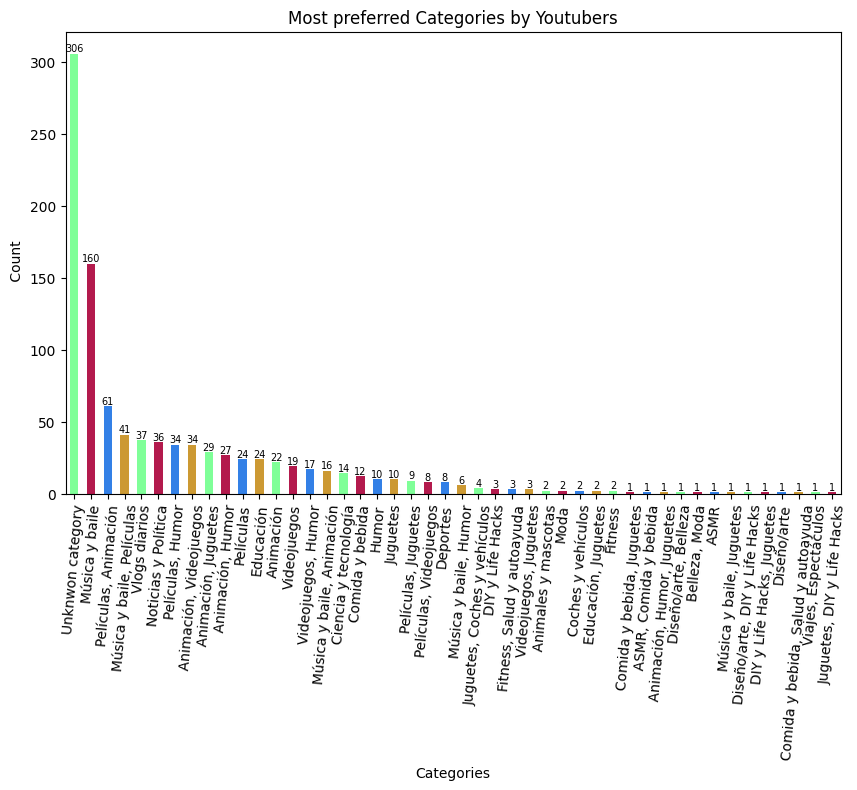

In [30]:
#REVIEW NUNBER OF MOST YOUTUBERS BY CATEGORY

from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))

colors = [(0,1, 0.2, 0.5), (0.7, 0.1, 0.3), (0.2, 0.5, 0.9), (0.8, 0.6, 0.2)]

# Plotting the bar chart with custom colors
df['Categories'].value_counts().plot(kind='bar', color=colors)

plt.title('Most preferred Categories by Youtubers')
plt.xlabel('Categories')
plt.ylabel(' Count')
plt.xticks(rotation= 85)

for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize= 7)

plt.show()

In [11]:
# ADD Streamers column

df['Streamers'] = df['Likes'] + df['Visits'] + df['Comments'] + df['Subscribers']
df.head()
# ALL ADDED COLUMNs MAKES UP THE SUM OF YOUTUBE STREAMERS SINCE THEY RESULT TO NUMBER OF STREAMS

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Streamers
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,249588978.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,306218500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,172524700.0
3,4,SETIndia,Unknwon category,162600000.0,India,15600.0,166.0,9.0,162615775.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,117412400.0


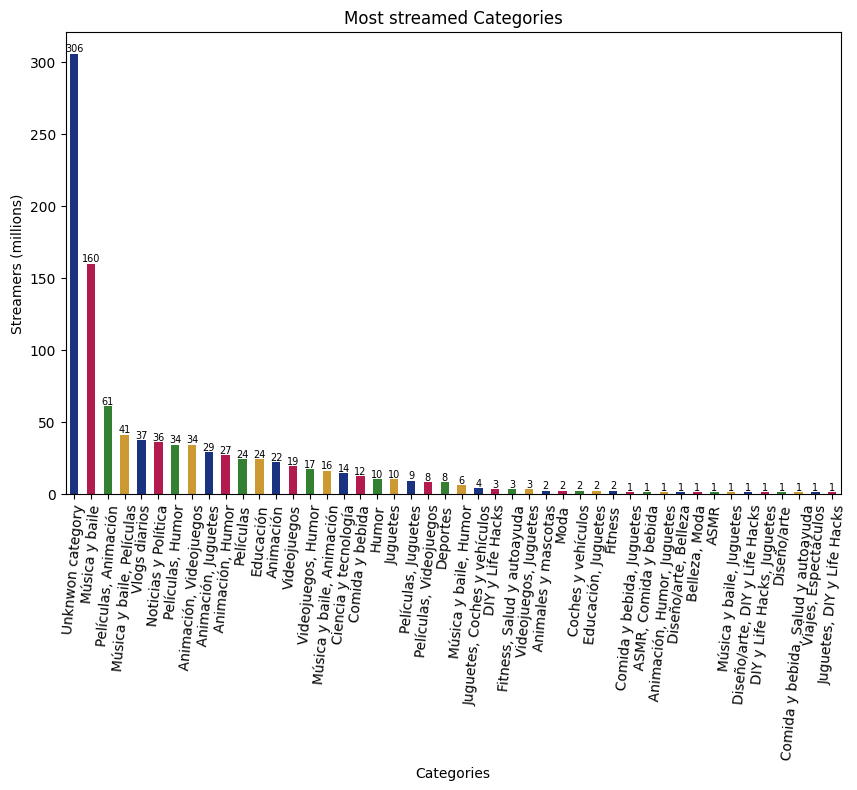

In [12]:
#Most streamed Categories

from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
# Define custom RGB colors for each category
colors = [(0.1, 0.2, 0.5), (0.7, 0.1, 0.3), (0.2, 0.5, 0.2), (0.8, 0.6, 0.2)]

# Plotting the bar chart with custom colors
df['Categories'].value_counts().plot(kind='bar', color=colors)

plt.title('Most streamed Categories')
plt.xlabel('Categories')
plt.ylabel('Streamers (millions)')
plt.xticks(rotation=85)
for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize=7)
plt.show()

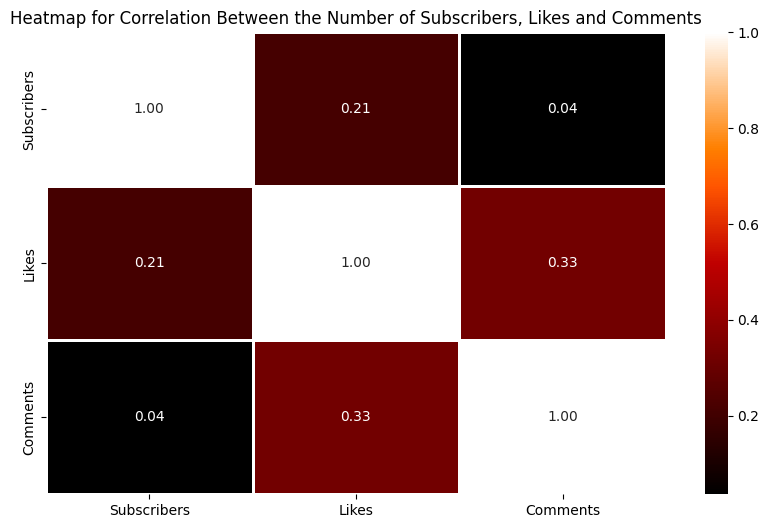

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

correlation_df = df[['Subscribers', 'Likes','Comments']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_df, annot=True, cmap='gist_heat', fmt='.2f',linewidths=.8)
plt.title("Heatmap for Correlation Between the Number of Subscribers, Likes and Comments")
plt.show()

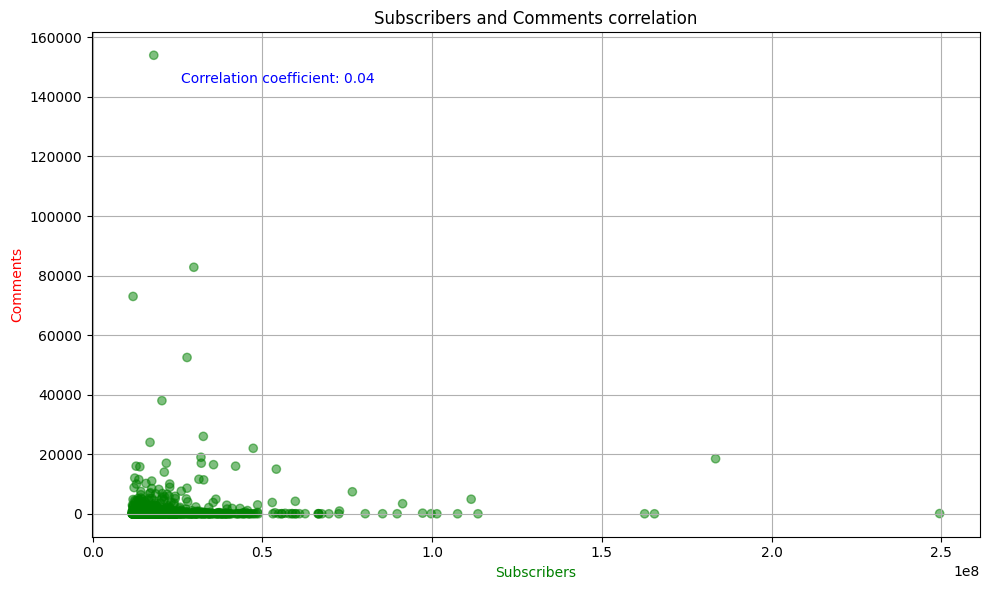

In [14]:
#SUBSCRIBERS VS COMMENTS CORELATION
import matplotlib.pyplot as plt
import pandas as pd

# Define colors based on the values of x (Subscribers) and y (Comments)
colors = np.where(df['Subscribers'] > df['Comments'], 'green', 'red')

plt.figure(figsize=(10, 6))
plt.scatter(df['Subscribers'], df['Comments'], c=colors, alpha=0.5)
plt.title('Subscribers and Comments correlation', color='black')
plt.xlabel('Subscribers', color='green')
plt.ylabel('Comments', color='red')

# Calculate correlation coefficient
correlation_coefficient = df['Subscribers'].corr(df['Comments'])
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, color='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

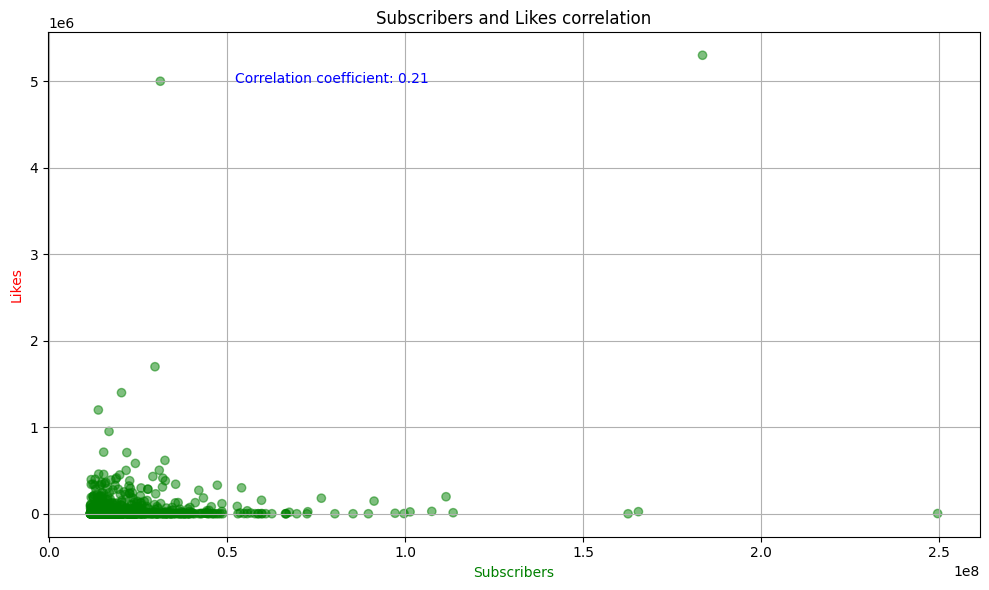

In [15]:
#SUBSCRIBERS VS LIKES CORELATION
colors = np.where(df['Subscribers'] > df['Likes'], 'green', 'red')

plt.figure(figsize=(10, 6))
plt.scatter(df['Subscribers'], df['Likes'], c=colors, alpha=0.5)
plt.title('Subscribers and Likes correlation', color='black')
plt.xlabel('Subscribers', color='green')
plt.ylabel('Likes', color='red')

# Calculate correlation coefficient
correlation_coefficient = df['Subscribers'].corr(df['Likes'])
plt.text(0.2, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, color='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

# 3. AUDIENCE STUDY

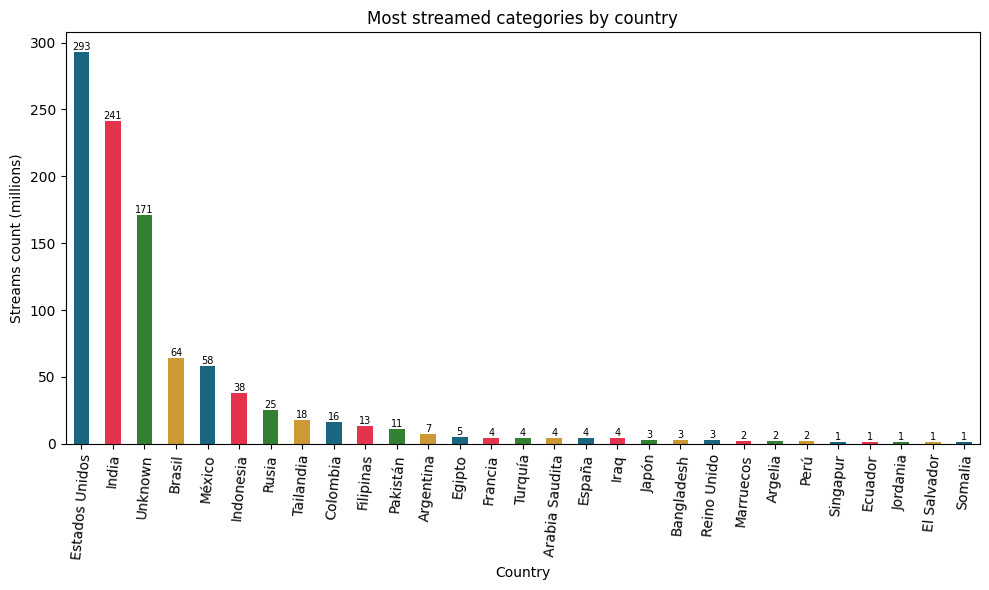

In [16]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
colors = [(0.1, 0.4, 0.5), (0.9, 0.2, 0.3), (0.2, 0.5, 0.2), (0.8, 0.6, 0.2)]
df['Country'].value_counts().plot(kind='bar', color=colors)
plt.title('Most streamed categories by country')
plt.xlabel('Country')
plt.ylabel('Streams count (millions)')
plt.xticks(rotation=85)
plt.tight_layout()

for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize=7)

plt.show()

# 4. PERFORMANCE METRICS

In [17]:
#CALCULATE AVERAGE
average_metrics= df[['Subscribers','Likes','Visits','Comments']].mean()
average_metrics

Subscribers    2.189440e+07
Likes          5.363259e+04
Visits         1.209446e+06
Comments       1.288768e+03
dtype: float64

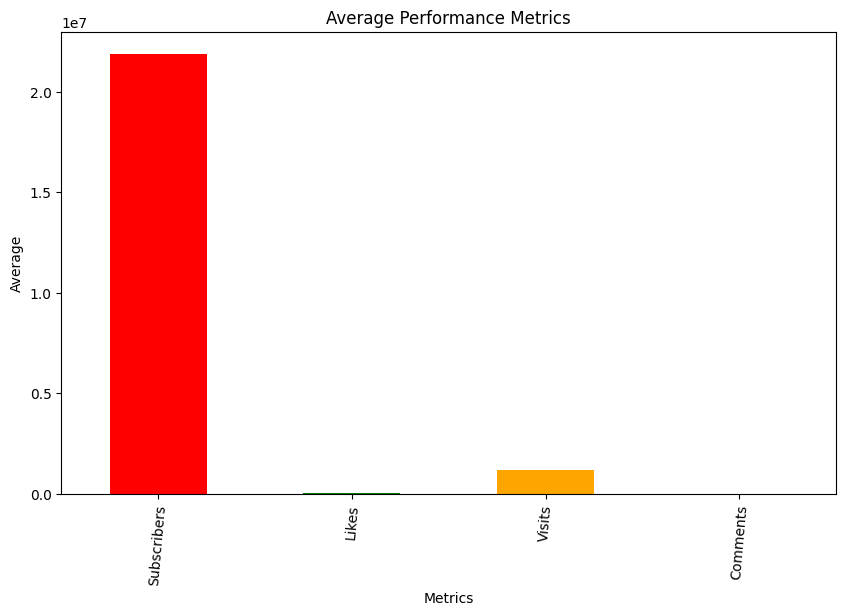

In [18]:
# PLOT THE AVERAGE METRICS
    
plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color=['red', 'green', 'orange', 'skyblue'])
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.xticks(rotation=85)
plt.show()


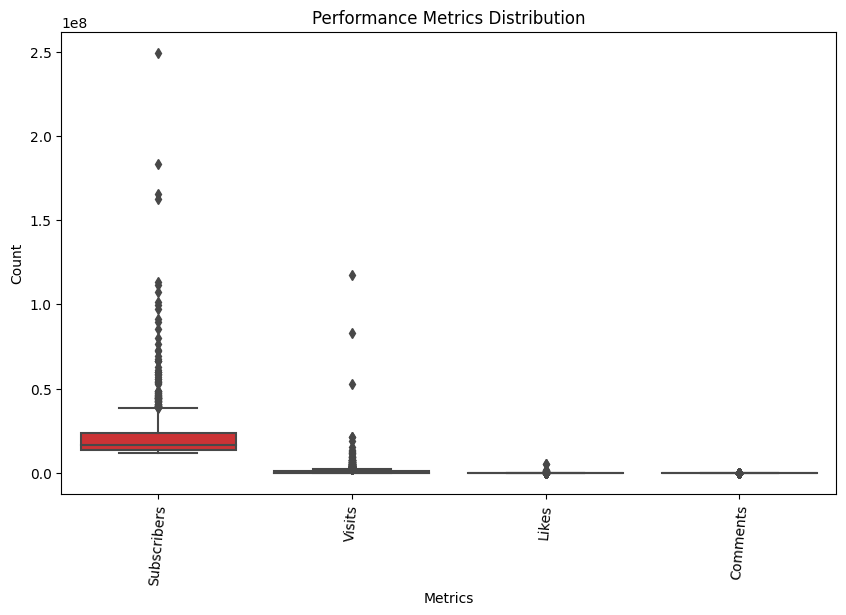

In [19]:
# DISTRIBUTE ANOMALIES AND PATTERNS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Subscribers', 'Visits', 'Likes', 'Comments']],palette='Set1')
plt.title('Performance Metrics Distribution')
plt.xlabel('Metrics')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()


# 5.CONTENT CATEGORIES

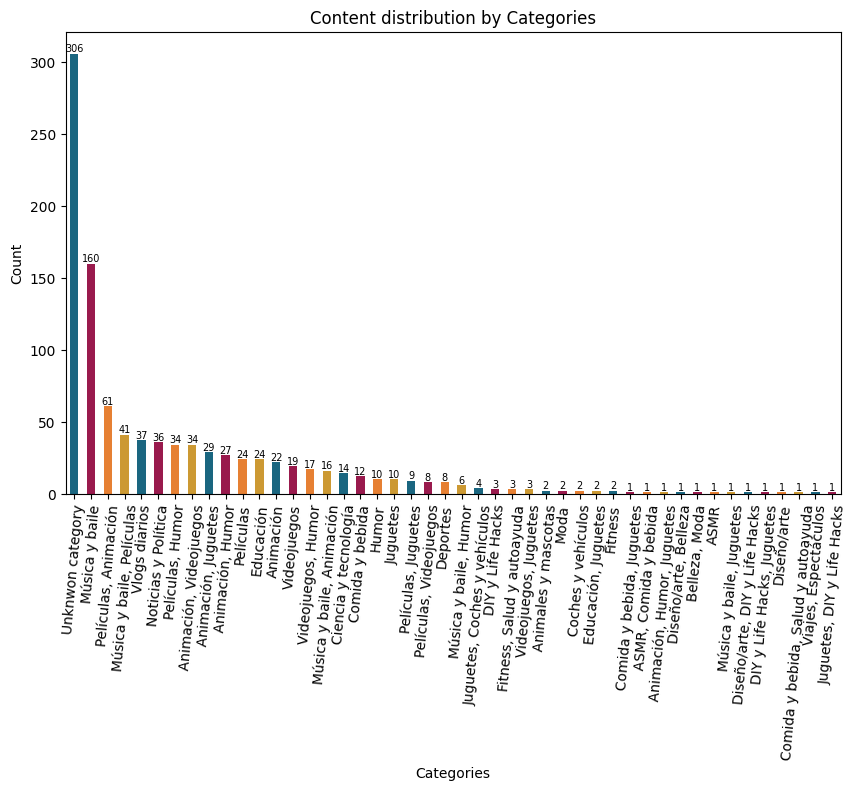

In [20]:
# DISTRIBUTION OF CONTENT CATEGORIES
plt.figure(figsize=(10, 6))

colors = [(0.1, 0.4, 0.5), (0.6, 0.1, 0.3), (0.9, 0.5, 0.2), (0.8, 0.6, 0.2)]
df['Categories'].value_counts().plot(kind='bar', color=colors)
plt.title('Content distribution by Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=85)
for bar in plt.gca().patches:
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                       ha='center', va='bottom', fontsize=7)
plt.show()

In [21]:
#IDENTIFY METRIC PER CATEGORY (AVerage) 
average_metrics = df.groupby('Categories')[['Subscribers','Likes','Comments','Visits']].mean()
average_metrics.head(10)


,Subscribers,Likes,Comments,Visits
Categories,,,,
ASMR,1.520000e+07,4100.000000,148.000000,3.685000e+05
"ASMR, Comida y bebida",1.300000e+07,8600.000000,349.000000,5.575000e+05
Animación,1.764091e+07,21413.454545,396.636364,6.367182e+05
"Animación, Humor",2.078519e+07,145768.333333,5344.962963,3.760126e+06
"Animación, Humor, Juguetes",1.390000e+07,37.000000,0.000000,8.000000e+03
"Animación, Juguetes",2.937586e+07,2653.068966,0.517241,5.254483e+05
"Animación, Videojuegos",1.939412e+07,79294.029412,3786.617647,1.200059e+06
Animales y mascotas,1.560000e+07,102750.000000,2806.000000,2.231450e+06
"Belleza, Moda",2.390000e+07,62300.000000,1100.000000,9.645000e+05


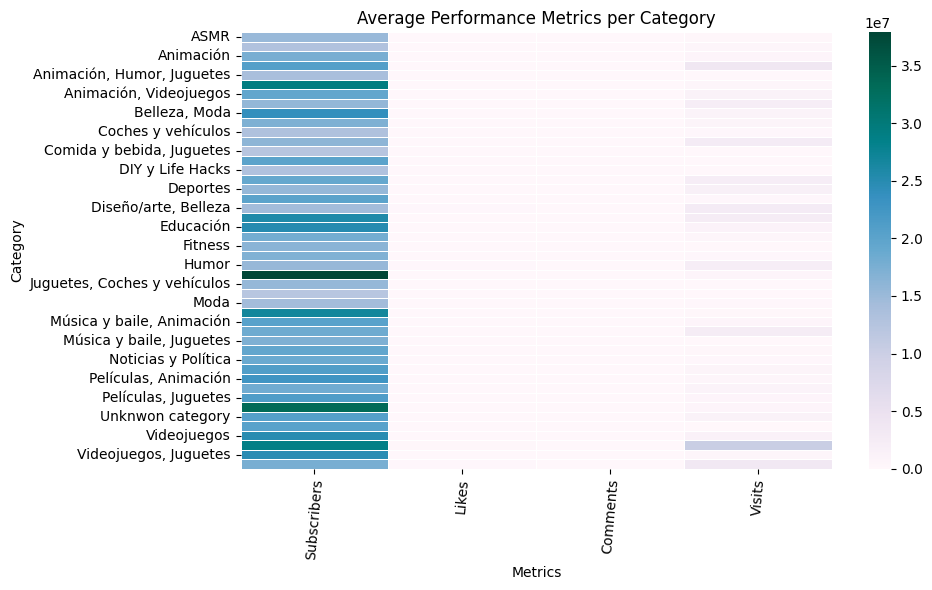

In [32]:
#EXCEPTIONAL PERFORMANCE METRICS PER CATEGORY
plt.figure(figsize=(10, 6))
sns.heatmap(average_metrics, cmap='PuBuGn', linewidths=0.5)
plt.title('Average Performance Metrics per Category')
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()


# 6. BRANDS AND COLLABORATIONS

In [23]:
average_Subscribers = df['Subscribers'].mean()
average_Visits = df['Visits'].mean()
average_Likes = df['Likes'].mean()
average_Comments = df['Comments'].mean()

print("Average Subscribers:", average_Subscribers)
print("Average Visits:", average_Visits)
print("Average Likes:", average_Likes)
print("Average Comments:", average_Comments)

Average Subscribers: 21894400.0
Average Visits: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


# 7. BENCHMARKING

In [24]:
#STREAMERS  WITH ABOVE-AVERAGE PERFORMANCE.
above_average_streamers= df[
  (df['Subscribers'] >average_Subscribers)+
 (df['Visits'] >average_Visits)+
 (df['Likes'] >average_Likes)+
 (df['Comments'] >average_Comments)]
    
above_average_streamers.head()   

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Streamers
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,249588978.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,306218500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,172524700.0
3,4,SETIndia,Unknwon category,162600000.0,India,15600.0,166.0,9.0,162615775.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,117412400.0


In [25]:
#DESCRIBING TOP YOUTUBERS
top_performing_youtubers = above_average_streamers.sort_values(by=['Username','Subscribers', 'Visits',
                                                         'Likes','Comments'], ascending=False)
top_performing_youtubers.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Streamers
135,136,zhong,Unknwon category,31400000.0,Estados Unidos,2900000.0,118300.0,887.0,34419187.0
16,17,zeetv,Unknwon category,72500000.0,India,7300.0,144.0,1.0,72507445.0
130,131,zeenews,Noticias y Política,32100000.0,India,14700.0,231.0,6.0,32114937.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,99776932.0
155,156,zamzamelectronicstradingllc,Unknwon category,29700000.0,India,268700.0,18400.0,489.0,29987589.0


In [26]:
# Display the top-performing content creators
print("Top Performing Youtubers:")
16
print(top_performing_youtubers[['Username', 'Subscribers', 'Visits', 'Likes',
'Comments','Streamers']])



Top Performing Youtubers:
                        Username  Subscribers     Visits     Likes  Comments  \
135                        zhong   31400000.0  2900000.0  118300.0     887.0   
16                         zeetv   72500000.0     7300.0     144.0       1.0   
130                      zeenews   32100000.0    14700.0     231.0       6.0   
8                zeemusiccompany   99700000.0    74300.0    2600.0      32.0   
155  zamzamelectronicstradingllc   29700000.0   268700.0   18400.0     489.0   
..                           ...          ...        ...       ...       ...   
43                      A4a4a4a4   47300000.0  9700000.0  330400.0   22000.0   
579                 A2Motivation   15500000.0   715000.0  103500.0     634.0   
13          5MinuteCraftsYouTube   80300000.0   164600.0     703.0      35.0   
226                        1theK   24700000.0    10100.0     595.0      29.0   
193               1MILLION_Dance   26300000.0    35300.0    1800.0      20.0   

      Streame

# 8. CONTENT RECOMMENDATIONS

In [34]:
#1.Define User Preferences:
Collect user preference interactions with the platform, 
such as watched videos, liked videos, search history, and subscribed channels.

#2.Recommendation Algorithm:
Utilize collaborative filtering techniques to recommend streamers to users 
based on their similarity to other users with similar preferences.

#3.User-Streamer Interaction Matrix:
Create a user-streamer interaction matrix that captures user engagement 
with each streamer,such as views, likes, comments, and subscriptions.

#4.Personalization and Ranking:
Personalize recommendations for each user by considering 
their historical interactions and preferences.

SyntaxError: invalid syntax (4011568827.py, line 2)